# Background Info: LA LIGA
1. Data source: Wikipedia (https://en.wikipedia.org/wiki/Real_Madrid_CF) 
2. Data Set. source: (https://www.football-data.co.uk/spainm.php)

The Campeonato Nacional de Liga de Primera División, commonly known simply as Primera División in Spain, and as La Liga in English-speaking countries and officially as LaLiga Santander for sponsorship reasons, stylized as LaLiga, is the men's top professional football division of the Spanish football league system.
The rankings in the league table are primarily determined by the points tally for each team, with ties broken down by goal difference. To predict the final standing of Real Madrid, it was, therefore, necessary to estimate total points for all teams. The problem is then reduced to predicting the outcome for all of the match fixtures.

A match between two teams can end in 3 possible outcomes: Home team win(H), Away team win(A) or a Tie (T). Teams receive 3 points for a win and 1 point for a draw.

# Context on Real Madrid F.C
# Real Madrid
Real Madrid Club de Fútbol, commonly referred to as Real Madrid or simply Real, is a Spanish professional football club based in Madrid. Founded on 6 March 1902 as Madrid Football Club, the club has traditionally worn a white home kit since inception.

The club was estimated to be worth €3.8 billion ($4.2 billion) in 2019, and it was the second highest-earning football club in the world, with an annual revenue of €757.3 million in 2019. The club is one of the most widely supported teams in the world. Real Madrid is one of three founding members of La Liga that have never been relegated from the top division since its inception in 1929, along with Athletic Bilbao and Barcelona. The club holds many long-standing rivalries, most notably El Clásico with Barcelona and El Derbi Madrileño with Atlético Madrid.

Real Madrid established itself as a major force in both Spanish and European football during the 1950s, winning five consecutive European Cups and reaching the final seven times. This success was replicated in the league, which the club won five times in the space of seven years. This team, which included Alfredo Di Stéfano, Ferenc Puskás, Francisco Gento, and Raymond Kopa, is considered by some in the sport to be the greatest team of all time.

In domestic football, the club has won 67 trophies; a record 34 La Liga titles, 19 Copa del Rey, 12 Supercopa de España, a Copa Eva Duarte, and a Copa de la Liga. In European and worldwide competitions, Real Madrid have won a record 26 trophies; a record 13 European Cup/UEFA Champions League titles, two UEFA Cups and four UEFA Super Cups. In international football, they have achieved a record seven club world championships.

Real Madrid was recognised as the FIFA Club of the 20th Century on 11 December 2000 with 42.35% of the vote, and received the FIFA Centennial Order of Merit on 20 May 2004. The club was also awarded Best European Club of the 20th Century by the IFFHS on 11 May 2010. In June 2017, the team succeeded in becoming the first club to win consecutive Champions League titles, then made it three in a row and four in five seasons in May 2018, extending their lead atop the UEFA club rankings. As of 2020, Real Madrid are ranked third behind Bayern Munich and Barcelona.

# Importing The Libraries

In [2]:
# Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression



# Investigating the data set by showing the output

In [ ]:
# Fetching the Data Set
df = pd.read_csv('/Users/la/Documents/Python/Practise PY/SP1.csv' ,parse_dates = ['Date'])
df.head()

# Checking the shape, Description and the data types of the Data set

In [4]:
# Understanding the Data set
df.shape

(289, 105)

In [5]:
# Checking the columns and data types
df.dtypes

Div                 object
Date        datetime64[ns]
Time                object
HomeTeam            object
AwayTeam            object
                 ...      
PCAHA              float64
MaxCAHH            float64
MaxCAHA            float64
AvgCAHH            float64
AvgCAHA            float64
Length: 105, dtype: object

In [6]:
# Statistical Description of the dataset
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,289.000000,289.000000,288.000000,288.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,1.442907,1.079585,0.650519,0.470588,12.865052,10.525952,4.332180,3.536332,13.792388,13.024221,...,1.793633,-0.313149,1.939549,1.966424,1.955087,1.975536,2.026090,2.042491,1.931419,1.947474
std,1.271083,1.094763,0.798659,0.702179,4.716158,4.227085,2.426783,2.134268,3.710694,3.905494,...,0.290156,0.679652,0.107146,0.103298,0.109052,0.110516,0.107463,0.114443,0.095625,0.096973
min,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,5.000000,4.000000,...,1.340000,-2.250000,1.680000,1.700000,1.720000,1.750000,1.810000,1.830000,1.730000,1.740000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.000000,2.000000,11.000000,10.000000,...,1.590000,-0.750000,1.860000,1.880000,1.870000,1.890000,1.940000,1.940000,1.860000,1.870000
50%,1.000000,1.000000,0.000000,0.000000,12.000000,10.000000,4.000000,3.000000,14.000000,13.000000,...,1.720000,-0.250000,1.945000,1.980000,1.950000,1.970000,2.010000,2.040000,1.930000,1.950000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,13.000000,6.000000,5.000000,16.000000,15.000000,...,1.960000,0.250000,2.030000,2.050000,2.040000,2.060000,2.110000,2.140000,2.010000,2.020000
max,6.000000,4.000000,3.000000,3.000000,36.000000,23.000000,12.000000,11.000000,25.000000,25.000000,...,3.090000,1.500000,2.170000,2.190000,2.210000,2.250000,2.330000,2.310000,2.150000,2.200000


In [7]:
df.head(5)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,SP1,2021-08-13,20:00,Valencia,Getafe,1,0,H,1,0,...,1.47,-0.25,2.06,1.87,2.07,1.86,2.10,1.90,2.03,1.84
1,SP1,2021-08-14,18:30,Cadiz,Levante,1,1,D,0,1,...,1.65,0.25,1.89,2.04,1.90,2.02,1.91,2.05,1.88,1.99
2,SP1,2021-08-14,18:30,Mallorca,Betis,1,1,D,1,0,...,1.59,0.00,1.79,2.15,1.82,2.13,1.85,2.19,1.80,2.09
3,SP1,2021-08-14,21:00,Alaves,Real Madrid,1,4,A,0,0,...,1.98,1.00,1.87,2.06,1.89,2.04,1.91,2.11,1.86,2.01
4,SP1,2021-08-14,21:00,Osasuna,Espanol,0,0,D,0,0,...,1.60,0.00,1.87,2.06,1.87,2.07,1.88,2.11,1.83,2.05


# Data Cleaning and Preparation
The Data set will be cleaned, checks for validity and checked for consinstency

In [8]:
# Data Cleaning and Preparation
df.isnull().any().sum()

11

In [9]:
num_rows = df.shape[0]
num_missing = num_rows - df.count() 
num_missing

np.count_nonzero(df.isnull())

11

In [10]:
df.dropna(how='all')
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,SP1,2021-08-13,20:00,Valencia,Getafe,1,0,H,1,0,...,1.47,-0.25,2.06,1.87,2.07,1.86,2.10,1.90,2.03,1.84
1,SP1,2021-08-14,18:30,Cadiz,Levante,1,1,D,0,1,...,1.65,0.25,1.89,2.04,1.90,2.02,1.91,2.05,1.88,1.99
2,SP1,2021-08-14,18:30,Mallorca,Betis,1,1,D,1,0,...,1.59,0.00,1.79,2.15,1.82,2.13,1.85,2.19,1.80,2.09
3,SP1,2021-08-14,21:00,Alaves,Real Madrid,1,4,A,0,0,...,1.98,1.00,1.87,2.06,1.89,2.04,1.91,2.11,1.86,2.01
4,SP1,2021-08-14,21:00,Osasuna,Espanol,0,0,D,0,0,...,1.60,0.00,1.87,2.06,1.87,2.07,1.88,2.11,1.83,2.05


In [11]:
# Checking for Duplicate Values
df.duplicated().any()

False

In [12]:
df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=105)

# Dropping all the irrelevant columns from the data set. We'll put them on a list then delete the list

In [13]:
# Columns to Drop as they are irrelevant to this particular study

list_to_drop = ['Div','Date','Time', 'HTHG', 'HTAG', 'AvgC<2.5', 'AHCh', 
'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA','HS', 'AS', 'HST', 'AST', 'HF',
'AF', 'HC',	'AC', 'HY','B365H',
       'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH',
       'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD',
       'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5',
       'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH',
       'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA',
       'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD',
       'IWCA', 'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD',
       'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA',
       'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5',
       'AvgC>2.5']

df.drop(list_to_drop, inplace=True, axis=1)


In [14]:
df.columns

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTR', 'AY', 'HR', 'AR'], dtype='object')

In [15]:
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTR,AY,HR,AR
0,Valencia,Getafe,1,0,H,H,3,1,1
1,Cadiz,Levante,1,1,D,A,5,0,0
2,Mallorca,Betis,1,1,D,H,3,0,0
3,Alaves,Real Madrid,1,4,A,D,2,0,0
4,Osasuna,Espanol,0,0,D,D,3,0,0


In [16]:
df.shape

(289, 9)

In [17]:
df.columns

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTR', 'AY', 'HR', 'AR'], dtype='object')

In [18]:
# Creating a function to check
def missing_values(data):
 
 # identifying the missing values from the demographic data dataset
 #
 miss = data.isnull().sum().sort_values(ascending = False)
 # finding the percentage of missing values
 percentage = (data.isnull().sum() / len(data)).sort_values(ascending = False)
 # storing  total missing values in percentage in dataframe
 #
 missing_data = pd.DataFrame({'Total' : miss, 'Percentage' : percentage})
 #if the percentage is 0, indicates no missing values hence removed
 #
 missing_data.drop(missing_data[missing_data['Percentage'] == 0].index, inplace = True)
 
 return missing_data
 
missing_values(df)


,Total,Percentage


# Check for Completeness and Consistency

In [19]:
df.isnull().any()

HomeTeam    False
AwayTeam    False
FTHG        False
FTAG        False
FTR         False
HTR         False
AY          False
HR          False
AR          False
dtype: bool

In [20]:
# occurrence based on all columns
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate


Duplicate Rows :


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTR,AY,HR,AR


In [21]:
df.duplicated().any()

False

In [22]:
df.describe()

,FTHG,FTAG,AY,HR,AR
count,289.000000,289.000000,289.000000,289.000000,289.000000
mean,1.442907,1.079585,2.657439,0.152249,0.093426
std,1.271083,1.094763,1.582331,0.369408,0.325307
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,3.000000,0.000000,0.000000
75%,2.000000,2.000000,4.000000,0.000000,0.000000
max,6.000000,4.000000,7.000000,2.000000,2.000000


In [23]:
# Drop the last un-needed columns from data set
drop_list = ['AR', 'HR', 'AY']

df.drop(drop_list, inplace=True, axis=1)

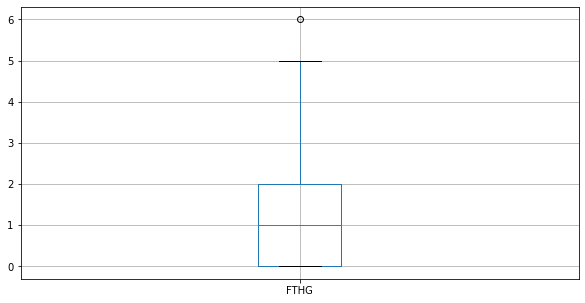

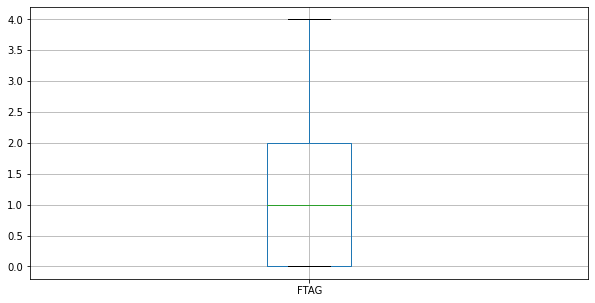

In [24]:
# Validity of my Data Set
#create a box plot for all columns with numbers 
df_num = df.select_dtypes(include = ['float64','int64']) #create a dataframe with just numbers 
for column in df_num:
    plt.figure(figsize=(10,5))
    df_num.boxplot([column])

In [25]:
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTR
0,Valencia,Getafe,1,0,H,H
1,Cadiz,Levante,1,1,D,A
2,Mallorca,Betis,1,1,D,H
3,Alaves,Real Madrid,1,4,A,D
4,Osasuna,Espanol,0,0,D,D


# Creation of a column that Displays the outcome of a match and how many points were gained in that particular game

In [26]:
#We create a new column called match_outcome.
df['match_outcome'] = df['FTR'] 
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTR,match_outcome
0,Valencia,Getafe,1,0,H,H,H
1,Cadiz,Levante,1,1,D,A,D
2,Mallorca,Betis,1,1,D,H,D
3,Alaves,Real Madrid,1,4,A,D,A
4,Osasuna,Espanol,0,0,D,D,D


In [27]:
df['match_outcome'] = df['match_outcome'].str.replace("H","3")
df['match_outcome'] = df['match_outcome'].str.replace("D","1")
df['match_outcome'] = df['match_outcome'].str.replace("A","3")
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTR,match_outcome
0,Valencia,Getafe,1,0,H,H,3
1,Cadiz,Levante,1,1,D,A,1
2,Mallorca,Betis,1,1,D,H,1
3,Alaves,Real Madrid,1,4,A,D,3
4,Osasuna,Espanol,0,0,D,D,1


# Now, we drop the Away Team as it does not add value to the analysis

In [28]:
# df.drop('AwayTeam', inplace=True, axis=1)
# df.head()

# Encoding the match Outcome column for it to work in our model

In [29]:
# Import label encoder 
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 
  

df['HTR'] = label_encoder.fit_transform(df['HTR']) 
df['FTR'] = label_encoder.fit_transform(df['FTR']) 
  
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTR,match_outcome
0,Valencia,Getafe,1,0,2,2,3
1,Cadiz,Levante,1,1,1,0,1
2,Mallorca,Betis,1,1,1,2,1
3,Alaves,Real Madrid,1,4,0,1,3
4,Osasuna,Espanol,0,0,1,1,1


In [30]:
print(f" \nHere are the unique values for HTR {df[ 'HTR'].unique()}")
print(f" \nHere are the unique values for FTR {df[ 'FTR'].unique()}")

 
Here are the unique values for HTR [2 0 1]
 
Here are the unique values for FTR [2 1 0]


The values: [2 1 0], represent:
2 - Win
1 - Draw
0 - Loss

In [31]:
df['HomeTeam'].unique()

array(['Valencia', 'Cadiz', 'Mallorca', 'Alaves', 'Osasuna', 'Celta',
       'Barcelona', 'Sevilla', 'Villarreal', 'Elche', 'Betis', 'Espanol',
       'Granada', 'Ath Bilbao', 'Sociedad', 'Ath Madrid', 'Levante',
       'Getafe', 'Vallecano', 'Real Madrid'], dtype=object)

# Place all team Names in their specific columns

# Exploratory Data Analysis
1. Univariate Analysis

In [32]:
df.dtypes


HomeTeam         object
AwayTeam         object
FTHG              int64
FTAG              int64
FTR               int64
HTR               int64
match_outcome    object
dtype: object

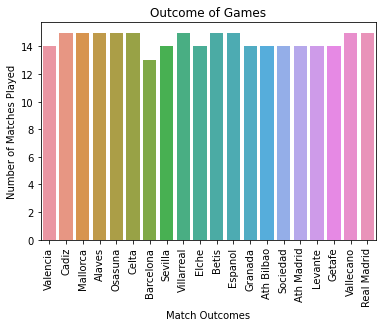

In [33]:
FTR = df['FTR']
HTR = df['HTR']
HomeTeam  = df['HomeTeam']


sns.countplot(x = df['HomeTeam'], data = FTR )
plt.title('Outcome of Games')
plt.ylabel('Number of Matches Played')
plt.xlabel('Match Outcomes')
plt.xticks(rotation = 90)
plt.show();

In [34]:
# x = df[(df['HomeTeam'] == 'Real Madrid') & (df['FTR']== 3)]
home_games = df[df['HomeTeam'] == 'Real Madrid']

# result = x[['HomeTeam']].sort_values(by = 'HomeTeam', ascending = False).head(10)
home_games

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTR,match_outcome
35,Real Madrid,Celta,5,2,2,0,3
53,Real Madrid,Mallorca,6,1,2,2,3
61,Real Madrid,Villarreal,0,0,1,1,1
102,Real Madrid,Osasuna,0,0,1,1,1
120,Real Madrid,Vallecano,2,1,2,2,3
144,Real Madrid,Sevilla,2,1,2,1,3
146,Real Madrid,Ath Bilbao,1,0,2,2,3
165,Real Madrid,Ath Madrid,2,0,2,2,3
175,Real Madrid,Cadiz,0,0,1,1,1
194,Real Madrid,Valencia,4,1,2,2,3


In [35]:

away_games = df[df['AwayTeam'] == 'Real Madrid']

# result = x[['HomeTeam']].sort_values(by = 'HomeTeam', ascending = False).head(10)
away_games

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTR,match_outcome
3,Alaves,Real Madrid,1,4,0,1,3
17,Levante,Real Madrid,3,3,1,0,1
25,Betis,Real Madrid,0,1,0,1,3
46,Valencia,Real Madrid,1,2,0,1,3
74,Espanol,Real Madrid,2,1,2,2,3
92,Barcelona,Real Madrid,1,2,0,0,3
106,Elche,Real Madrid,1,2,0,0,3
132,Granada,Real Madrid,1,4,0,0,3
151,Sociedad,Real Madrid,0,2,0,1,3
180,Ath Bilbao,Real Madrid,1,2,0,0,3


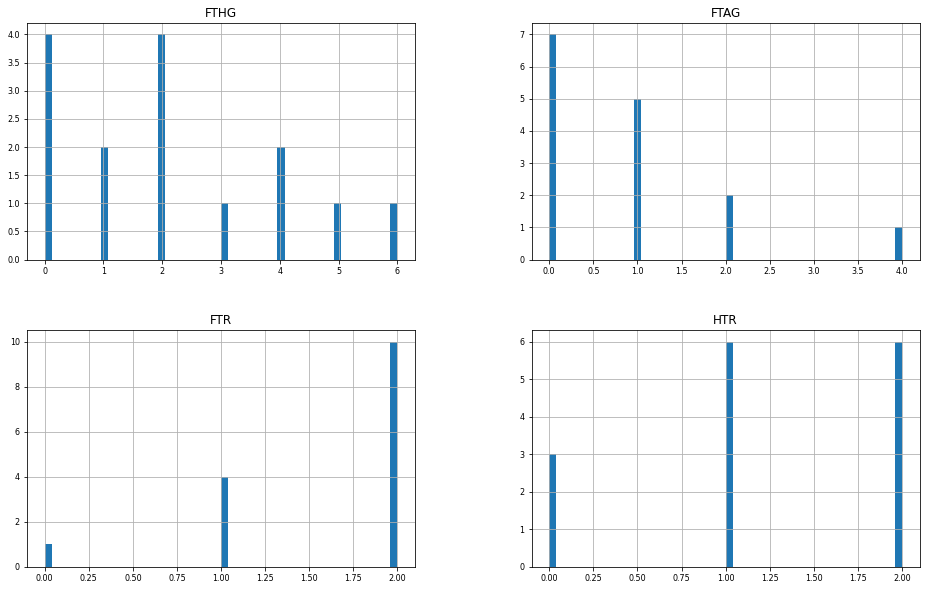

In [36]:
#Analyse all the columns 
home_games.hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8);

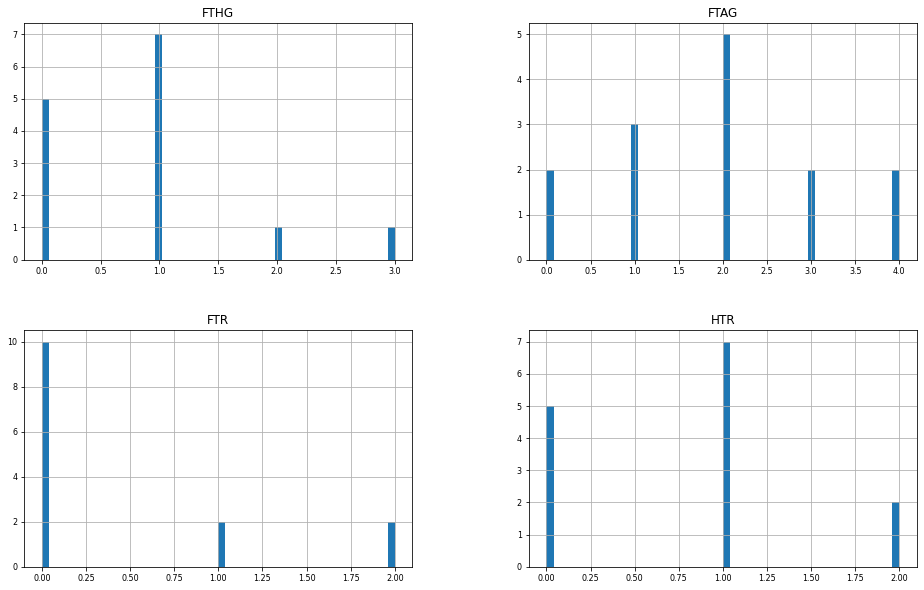

In [37]:
#Analyse all the columns 
away_games.hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8);

# Bivariate Analysis

          FTHG      FTAG       FTR       HTR
FTHG  1.000000  0.140867  0.634519  0.268635
FTAG  0.140867  1.000000 -0.481673 -0.540766
FTR   0.634519 -0.481673  1.000000  0.612372
HTR   0.268635 -0.540766  0.612372  1.000000


<AxesSubplot:>

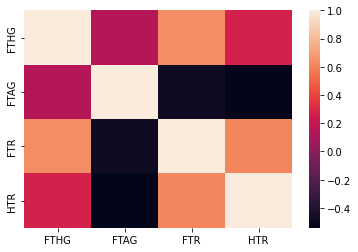

In [38]:
print(home_games.corr())

sns.heatmap(home_games.corr())

Output:
As you can see the probabilty of win....

          FTHG      FTAG       FTR       HTR
FTHG  1.000000  0.270514  0.454054 -0.181788
FTAG  0.270514  1.000000 -0.527032 -0.538754
FTR   0.454054 -0.527032  1.000000  0.623648
HTR  -0.181788 -0.538754  0.623648  1.000000


<AxesSubplot:>

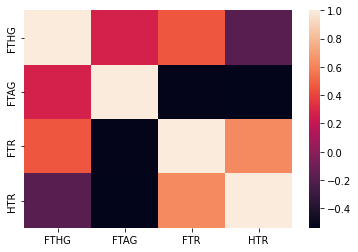

In [39]:
print(away_games.corr())

sns.heatmap(away_games.corr())

Output:
As you can see the probabilty of win....

Output Insights:


# Baseline Model: Polynomial Regression

In [40]:
#create the dependent and independent variables 
y = away_games["FTR"].values.reshape(-1, 1)
X = away_games[[ 'FTHG', 'FTAG', 'FTR', 'HTR', 'match_outcome']]





In [41]:
# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=25)


In [42]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


In [43]:
#Train the model
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
# Prints y-intercept
print(pol_reg.intercept_)

[0.63073662]


In [44]:

# Prints the beta coefficients in order
print(pol_reg.coef_)
#predict using the model
g= pol_reg.predict(X_poly)
g

[[ 1.11022302e-16  1.21904767e-02  1.08109221e-02  5.68087173e-02
  -1.18028478e-03 -1.67199674e-02  7.54655985e-03 -3.74085599e-16
   2.57866133e-02 -2.13421056e-02  5.35023044e-04  8.55897515e-17
  -2.26621203e-02 -1.83888425e-16 -3.60364069e-03  1.05257451e-01
   9.92513830e-02  1.53706184e-01  4.72684488e-02 -8.24868611e-03
  -6.68798697e-02]]


array([[-1.44328993e-15],
       [ 1.00000000e+00],
       [-4.44089210e-16],
       [-8.88178420e-16],
       [ 2.00000000e+00],
       [ 1.11022302e-16],
       [ 1.11022302e-16],
       [-1.11022302e-16],
       [-5.55111512e-16],
       [ 1.11022302e-16],
       [ 2.00000000e+00],
       [ 1.00000000e+00],
       [-4.44089210e-16],
       [-6.66133815e-16]])

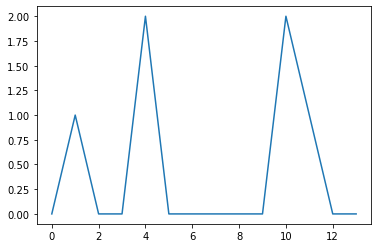

In [45]:
plt.plot(g)